In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [24]:
data_dir = "../data"
input_image_path = os.path.join(data_dir, "road_lane.jpg")
txt_file_path = os.path.join(data_dir, "input_image.txt")

In [25]:
def read_and_display_image(path, resize_dim=(256,256)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    
    if resize_dim is not None:
        img = cv2.resize(img, resize_dim)

    plt.imshow(img, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')
    plt.show()

    return img

In [26]:
def write_image_to_txt(img, txt_path):
    with open(txt_path, 'w') as f:
        for pixel in img.flatten():
            f.write(f"{pixel:02X}\n")  # hex format
    print(f"Image written to {txt_path}")

In [27]:
def read_txt_and_plot(txt_path, shape=(256,256)):
    with open(txt_path, 'r') as f:
        pixels = [int(line.strip(), 16) for line in f.readlines()]
    img = np.array(pixels, dtype=np.uint8).reshape(shape)
    plt.imshow(img, cmap='gray')
    plt.title("Image from Text File")
    plt.axis('off')
    plt.show()
    return img


In [28]:

def apply_canny_python(img, low_thresh=50, high_thresh=150):
    edges = cv2.Canny(img, low_thresh, high_thresh)

    plt.figure(figsize=(5,5))
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge (Python OpenCV)")
    plt.axis('off')
    plt.show()

    return edges

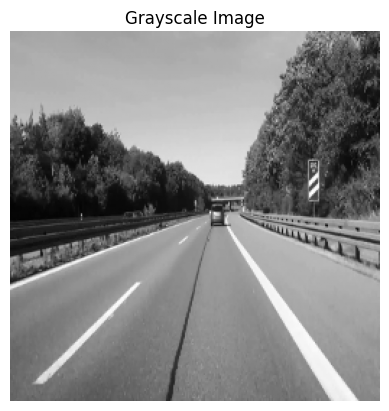

Image written to ../data/input_image.txt


In [29]:
img = read_and_display_image(input_image_path)
write_image_to_txt(img, txt_file_path)

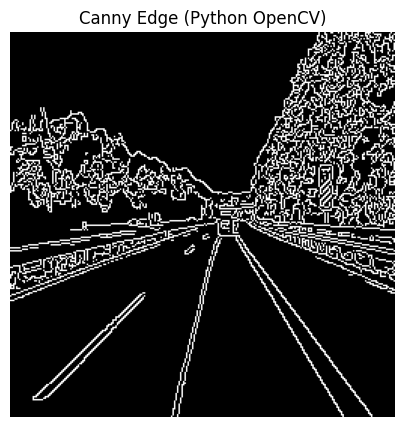

In [30]:
canny_python = apply_canny_python(img)

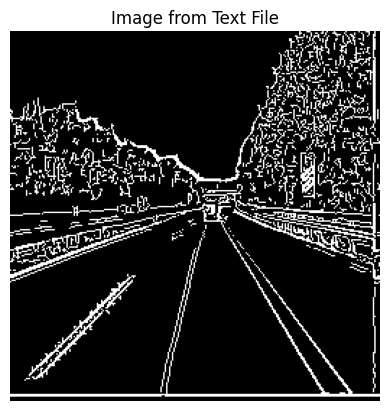

In [31]:
#output image after applying gaussian blur in Verilog testbench

out_file_path = os.path.join("/home/bikash-pokhrel/canny_edge_detection_fpga/canny_edge_detection_fpga.sim/sim_1/behav/xsim/output_image.txt")
img_from_txt = read_txt_and_plot(out_file_path)

In [32]:
import math

def generate_verilog_lut():
    steps = 32 # 180 degrees / 32
    scale = 64 # Fixed point scale
    
    print("// COPY PASTE THIS INTO hough_transform.v inside 'initial begin'")
    for i in range(steps):
        # Angle from 0 to 180 degrees
        angle_rad = (i * 180.0 / steps) * (math.pi / 180.0)
        
        # Calculate fixed point values
        c = int(round(math.cos(angle_rad) * scale))
        s = int(round(math.sin(angle_rad) * scale))
        
        print(f"        cos_table[{i}] = {c}; sin_table[{i}] = {s};")

generate_verilog_lut()

// COPY PASTE THIS INTO hough_transform.v inside 'initial begin'
        cos_table[0] = 64; sin_table[0] = 0;
        cos_table[1] = 64; sin_table[1] = 6;
        cos_table[2] = 63; sin_table[2] = 12;
        cos_table[3] = 61; sin_table[3] = 19;
        cos_table[4] = 59; sin_table[4] = 24;
        cos_table[5] = 56; sin_table[5] = 30;
        cos_table[6] = 53; sin_table[6] = 36;
        cos_table[7] = 49; sin_table[7] = 41;
        cos_table[8] = 45; sin_table[8] = 45;
        cos_table[9] = 41; sin_table[9] = 49;
        cos_table[10] = 36; sin_table[10] = 53;
        cos_table[11] = 30; sin_table[11] = 56;
        cos_table[12] = 24; sin_table[12] = 59;
        cos_table[13] = 19; sin_table[13] = 61;
        cos_table[14] = 12; sin_table[14] = 63;
        cos_table[15] = 6; sin_table[15] = 64;
        cos_table[16] = 0; sin_table[16] = 64;
        cos_table[17] = -6; sin_table[17] = 64;
        cos_table[18] = -12; sin_table[18] = 63;
        cos_table[19] = -19; sin_table[19] = 6